# DATS 6103 - Project 2: Analyzing GW Prospect and Proposal Data

By: Elise Roberts

### Preliminary Research

The fundraising industry in the United States is an increasingly data-driven field. Over the last few years, universities, advocacy groups, health care organizations, arts institutions, and other non-profit organizations across the country have been hiring data scientists to provide insights on their fundraising operations. Adopting analytics on a large scale has the potential to dramatically improve the operations of any institution, but particularly non-profit organizations. Already, some institutions have done tremendous work analyzing their donor base, implementing real-time data dashboards, and using projection analysis to predict year-end fundraising totals. 

Given my role as the Senior Prospect and Portfolio Analyst in the Research and Relationship Management Department of the Division of Alumni Relations at GW, for project 2, I will analyze proposal data from 2018 to October 2020 from the university along with the corresponding prospect data. By learning more about our donors and our proposals, we can glean insights about the best way to fundraise for the university in the future. In this project, I will look for correlations between different proposal data points and project whether or not the university will meet or exceed our fundraising goal for the year. 

### Definitions

Philanthropy at GW is of critical importance to sustain programming, fund research, provide scholarships to students, and build the future of the university. Within the Division of Development and Alumni Relations (DAR) at GW, it is our responsibility to raise funds from our community to support these initatives. Major Gift Officers (MGOs) are hired by the university to cultivate relationships with prospects and provide them with funding opportunities within the university. Prospects at GW are defined as the alumni, parents, faculty, friends, and organizations that have the capacity and inclination to give a major gift to the university. When an MGO has identified a funding opportunity for the prospect, they will enter a proposal into our donor database (Ellucian Advance). The proposal is essentially a documented plan in our donor database of when the MGO will ask their assigned prospect and for what initiative. After the solicitation occurs, the proposal is updated to document this ask, and when the donor decides to give, the result is documented as well.

### Importing Libraries

In [221]:
#import libraries

import pandas as pd
import numpy as nm
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as grd
import scipy.stats
import re
from os import path
from PIL import Image

In [222]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [223]:
!pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl


In [224]:
import plotly.express as px

### Reading in the Data

For project 2, I will be analyzing prospect and proposal data exported directly from GW's donor database, Ellucian Advance, from 1/1/2018 to 10/15/2020. In order to protect donor identities, I have removed all personally identifiable information, including names, phone numbers, addresses, email addresses, employment information, and more. Prior to removing NA's, my data set consists of two different files: 
- Proposal Data (4,776 rows and 35 columns)
- Prospect Data (2,980 rows and 90 columns)

In [225]:
#reading in the data

#proposal data
prop = pd.read_excel("Proposals_2018_2020.xlsx")

#prospect data
pros = pd.read_excel("Prospect_Data.xlsx")

In [226]:
prop.info() #check data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 35 columns):
Entity ID                          4776 non-null int64
Prospect ID                        4776 non-null int64
Primary Entity Record Type(s)      4776 non-null object
Top 200                            4776 non-null object
Proposal ID                        4776 non-null int64
Proposal Manager Start Date        4764 non-null datetime64[ns]
Active                             4776 non-null object
Proposal Status                    4776 non-null object
Proposal Stage                     4776 non-null object
Proposal Type                      4776 non-null object
Proposal Unit                      4776 non-null object
Proposal Purpose                   268 non-null object
Proposal Title                     4776 non-null object
Anticipated Ask Amount             4776 non-null float64
Anticipated Ask Date               4769 non-null datetime64[ns]
Expected Amount                    4776 

In [227]:
pros.info() #check data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 90 columns):
Entity ID                          2976 non-null int64
Prospect ID                        2976 non-null int64
Primary Prospect Ind               2976 non-null object
Person or Org Ind                  2976 non-null object
Spouse ID                          2976 non-null object
Spouse Prospect ID                 708 non-null object
Prospect Type Description          2976 non-null object
Confirmed Rating Code              2353 non-null object
Confirmed Rating Desc              2352 non-null object
Confirmed Eval Date                2200 non-null object
Overall Engagement Score           1550 non-null float64
Philanthropic Engagement Score     1550 non-null float64
Volunteer Engagement Score         1550 non-null float64
Experiential Engagement Score      1550 non-null float64
Communication Engagement Score     1550 non-null float64
GW Research Rating Code            2183 non-null ob

### Replacing NaN's with an Empty String

In [228]:
#convert NaN's to empty strings
prop = prop.replace(nm.nan, '', regex=True)
pros = pros.replace(nm.nan, '', regex=True)

In [229]:
#check data frame
prop.head()

,Entity ID,Prospect ID,Primary Entity Record Type(s),Top 200,Proposal ID,Proposal Manager Start Date,Active,Proposal Status,Proposal Stage,Proposal Type,...,Proposal Start Date,Proposal End Date,Prospect Stage,Months In Stage,Confirmed Rating,Last Visit Date,Last Visit Purpose,Last Contact Date,Last Contact Type,Last Contact Purpose
0,621376,142684,Friend,No,13650,1514764800000000000,N,Closed,Ask Accepted,School/Unit Support,...,2018-01-01,1514851200000000000,Cultivate,6,K1-$500K - $999K,1602460800000000000,Volunteer Engagement,1602460800000000000,Visit,Volunteer Engagement
1,429085,128316,Emeritus Faculty/Staff,No,14045,1526428800000000000,N,Closed,Ask Accepted,School/Unit Support,...,2018-01-01,1553472000000000000,Strategically Steward,19,G1-$50K - $99K,1591920000000000000,Engage and Cultivate,1591920000000000000,Visit,Engage and Cultivate
2,551174,140304,Former Parent,No,13656,1516147200000000000,N,Closed,Ask Accepted,School/Unit Support,...,2018-01-01,1520208000000000000,Strategically Steward,7,H1-$100K - $249K,1525910400000000000,Engage and Cultivate,1599696000000000000,Email,Solicit
3,286720,135937,Alumnus/a,No,13630,1514764800000000000,N,Closed,Ask Declined,School/Unit Support,...,2018-01-01,1525132800000000000,Strategically Steward,4,"D1-$5,000 - $9,999",1518652800000000000,Steward,1594684800000000000,Correspondence,Steward
4,165950,106199,Alumnus/a,No,3054,,N,Withdrawn,Clearance,School/Unit Support,...,2018-01-01,1522368000000000000,Not A Prospect Now,17,"C1-$1,000 - $4,999",1557792000000000000,Qualify,1557792000000000000,Visit,Qualify


In [230]:
#check data frame
pros.head()

,Entity ID,Prospect ID,Primary Prospect Ind,Person or Org Ind,Spouse ID,Spouse Prospect ID,Prospect Type Description,Confirmed Rating Code,Confirmed Rating Desc,Confirmed Eval Date,...,Degree 2,Degree Desc 2,Major 2,Speciality 1,Speciality 2,Speciality 3,Speciality 4,No Contact Ever,Special Handling,Prospect Int Y/N
0,582986,141298,Y,P,,,Major Gifts,H1,$100K - $249K,2019-07-19 00:00:00,...,,,,,,,,,,Y
1,750595,149000,Y,O,,,Major Gifts,H1,$100K - $249K,2018-10-18 00:00:00,...,,,,,,,,,,N
2,749697,148810,Y,O,,,Luther Rice,F1,$25K - $49K,2018-03-28 00:00:00,...,,,,,,,,,,Y
3,756795,149802,Y,P,,,Major Gifts,J1,$250K - $499K,2019-02-25 00:00:00,...,,,,,,,,,,N
4,776367,151488,Y,O,,,Major Gifts,J1,$250K - $499K,2019-08-07 00:00:00,...,,,,,,,,,,N


### Merge Data Frames Together

In [231]:
#merge data frames
data = pd.merge(prop, pros, on = ['Prospect ID'], how = 'inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778 entries, 0 to 4777
Columns: 124 entries, Entity ID_x to Prospect Int Y/N
dtypes: datetime64[ns](3), float64(10), int64(7), object(104)
memory usage: 4.6+ MB


In [232]:
data.head() #check data frame

,Entity ID_x,Prospect ID,Primary Entity Record Type(s),Top 200,Proposal ID,Proposal Manager Start Date,Active,Proposal Status,Proposal Stage,Proposal Type,...,Degree 2,Degree Desc 2,Major 2,Speciality 1,Speciality 2,Speciality 3,Speciality 4,No Contact Ever,Special Handling,Prospect Int Y/N
0,621376,142684,Friend,No,13650,1514764800000000000,N,Closed,Ask Accepted,School/Unit Support,...,,,,,,,,,,Y
1,621376,142684,Friend,No,14379,1531440000000000000,N,Closed,Ask Accepted,School/Unit Support,...,,,,,,,,,,Y
2,621376,142684,Friend,No,16544,1565308800000000000,N,Closed,Ask Accepted,School/Unit Support,...,,,,,,,,,,Y
3,621376,142684,Friend,No,16546,1565308800000000000,N,Closed,Ask Accepted,School/Unit Support,...,,,,,,,,,,Y
4,621376,142684,Friend,No,16545,1565308800000000000,Y,Open,Clearance,School/Unit Support,...,,,,,,,,,,Y


# Exploratory Data Analysis of Prospect Data

Before we take a look at the proposals, let's examine who are the prospects that the university has or plans to solicit for funds. Knowing a bit more about our donorbase could provide some insights on what proposals are solicited. 

### Domestic Geographic Distribution of Prospects

First, where do our prospects live? When allocating resources for MGO travel (prior to the pandemic), it is important to identify where the largest proportion of prospects live to then distribute geographic regions accordingly. 

In [233]:
#create a subset of prospects who live in the US
usa = data[data['Home Country'] == 'United States'].copy()
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4777
Columns: 124 entries, Entity ID_x to Prospect Int Y/N
dtypes: datetime64[ns](3), float64(10), int64(7), object(104)
memory usage: 4.4+ MB


In [234]:
#create dataframe of counts for each state
usa_count = pd.DataFrame(usa['Home State Code'].value_counts())
usa_count.info()
usa_count.index.name = 'Home State Code'
usa_count.columns = ['count']
usa_count.reset_index(inplace=True)
usa_count.head()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, DC to PR
Data columns (total 1 columns):
Home State Code    50 non-null int64
dtypes: int64(1)
memory usage: 800.0+ bytes


,Home State Code,count
0,DC,795
1,NY,621
2,VA,538
3,MD,519
4,CA,487


In [235]:
#create a map of the United States shading the distribution of prospects
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations = usa_count['Home State Code'],
    z = usa_count['count'],
    text = usa_count['Home State Code'],
    locationmode='USA-states',
    autocolorscale=True,
    marker_line_color='rgb(255,255,255)',
    marker_line_width=2,
    colorbar_tickprefix = '',
    colorbar_title = 'Geographic Distribution of Prospects'
))
    
fig.update_layout(
    title_text = 'Geographic Distribution of Prospects',
    geo= dict(
        showframe=False,
        showcoastlines=True,
        showlakes=True,
        lakecolor='rgb(95,145,237)',
        projection_type='albers usa'),
)
fig.show()

### Distribution of Prospect Record Types

Now that we know a little bit about the proposals, let's take a look at the Prospect Types of the folks that are being solicited by our GW Major Gift Officers. Who are our major gift prospects?

Text(0.5, 0, 'Frequency')

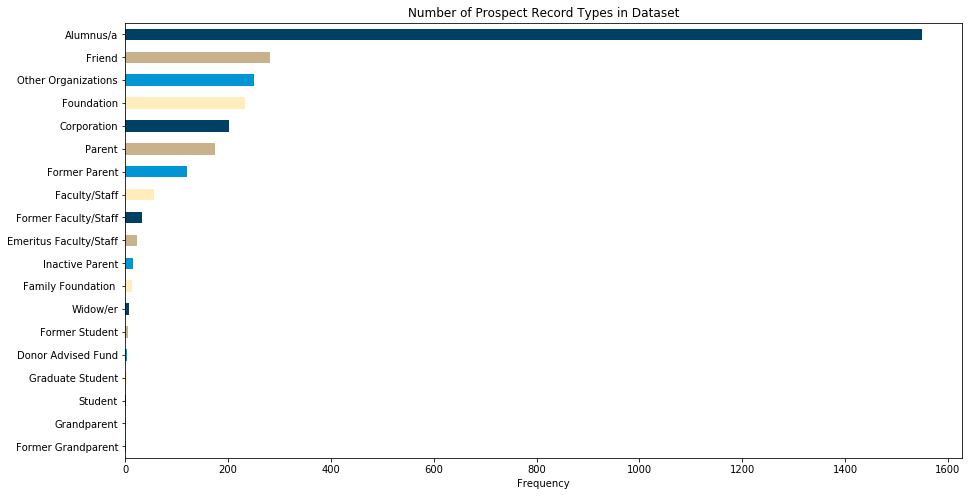

In [236]:
# plotting frequency distribution of prospect record types, using pros data set to remove duplicates
pros['Record Type Desc1'].value_counts().plot(kind='barh', figsize=(15,8), 
                                                  color=['#004065', '#c8b18b', '#0096d6', '#ffeebb'] ).invert_yaxis()
plt.title('Number of Prospect Record Types in Dataset')
plt.xlabel('Frequency')

## Alumni

Let's briefly take a look at the alumni donor base, particularly, from which school did a majority of alumni graduate?

In [237]:
#subsetting data to remove blank cells
school = pros[pros['Pref School Code'] != ' '].copy()
school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1563 entries, 9 to 2945
Data columns (total 90 columns):
Entity ID                          1563 non-null int64
Prospect ID                        1563 non-null int64
Primary Prospect Ind               1563 non-null object
Person or Org Ind                  1563 non-null object
Spouse ID                          1563 non-null object
Spouse Prospect ID                 1563 non-null object
Prospect Type Description          1563 non-null object
Confirmed Rating Code              1563 non-null object
Confirmed Rating Desc              1563 non-null object
Confirmed Eval Date                1563 non-null object
Overall Engagement Score           1563 non-null object
Philanthropic Engagement Score     1563 non-null object
Volunteer Engagement Score         1563 non-null object
Experiential Engagement Score      1563 non-null object
Communication Engagement Score     1563 non-null object
GW Research Rating Code            1563 non-null object

Text(0.5, 0, 'Frequency')

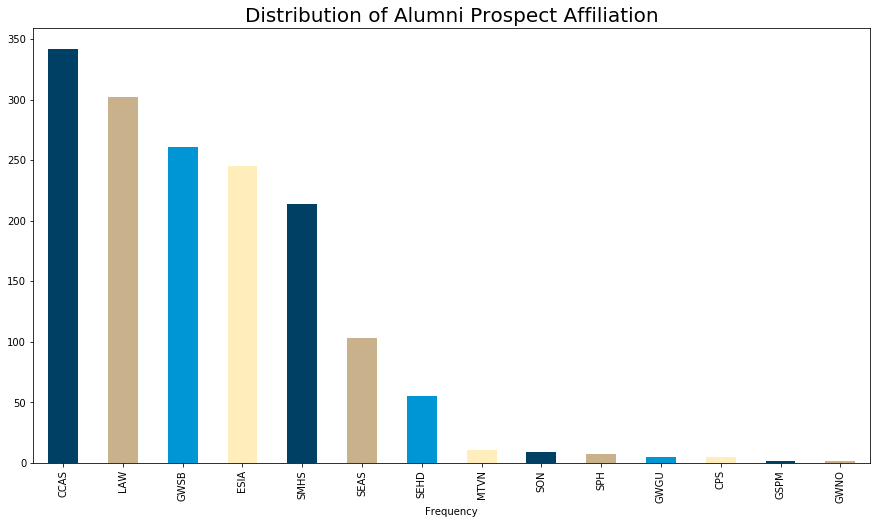

In [238]:
# plot distribution of preferred school codes
school['Pref School Code'].value_counts().plot(kind='bar', figsize=(15,8), 
                                                  color=['#004065', '#c8b18b', '#0096d6', '#ffeebb'] )
plt.title('Distribution of Alumni Prospect Affiliation', fontsize=20)
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

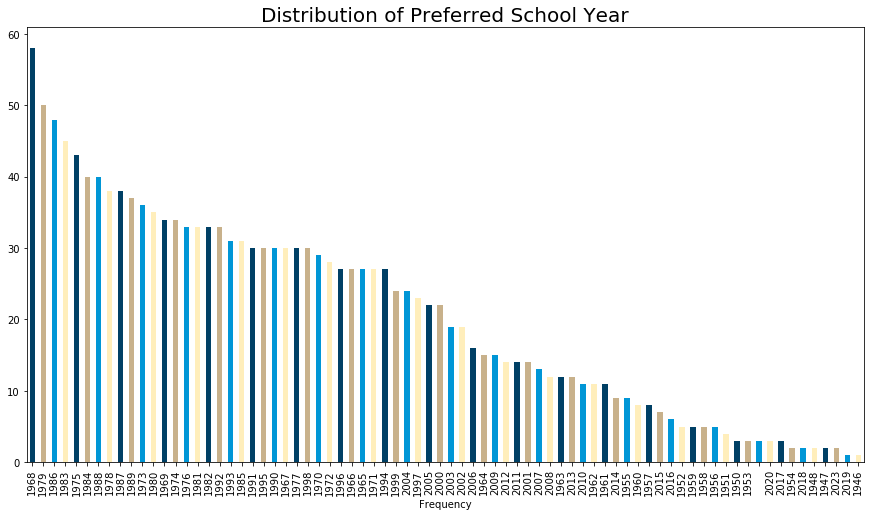

In [239]:
school['Pref Class Year'].value_counts().plot(kind='bar', figsize=(15,8), 
                                              color=['#004065', '#c8b18b', '#0096d6', '#ffeebb'])
plt.title('Distribution of Preferred School Year', fontsize=20)
plt.xlabel('Frequency')

### Philanthropic Capacity

What is the philanthropic capacity of our major gift prospects? In addition to having an interest in giving to GW, prospects also have to have the financial capacity to give a major gift. At GW, there are several different ratings we use to assess a prospect's philanthropic capacity: GW Research Qualification Ratings, GW Research Ratings, and Confirmed Ratings.

### Distribution of GW Research Qualification Ratings

The GW Research Qualification Rating is an initial assessment of a prospect's philanthropic capacity. The qualification is based on a specific grouping of metrics and has been calculated by a vendor. It puts a prospect into 5-, 6-, or 7-figure philanthropic capacity buckets. 

In [240]:
#subset data to only prospects who have a GW Research Qualification Rating
qual = data[data['GW Research Qualification'] != ''].copy()
qual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 0 to 4775
Columns: 124 entries, Entity ID_x to Prospect Int Y/N
dtypes: datetime64[ns](3), float64(10), int64(7), object(104)
memory usage: 2.6+ MB


Text(0.5, 1.0, 'Proportion of Prospects with a GW Research Qualification Rating')

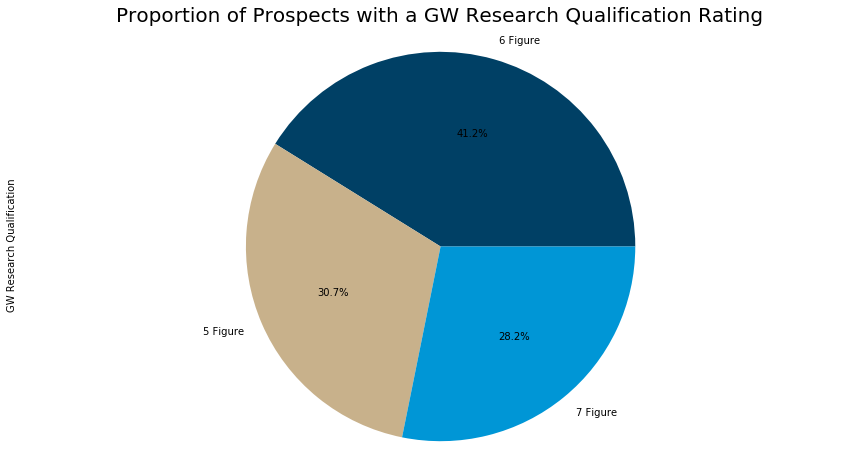

In [241]:
#plotting proportion of prospects based on GW Research Qualification Rating
qual['GW Research Qualification'].value_counts().plot(kind='pie', figsize=(15,8), autopct='%1.1f%%', 
                                            colors=['#004065', '#c8b18b', '#0096d6']) #colors
plt.axis('equal')
plt.title('Proportion of Prospects with a GW Research Qualification Rating', fontsize=20)

### Distribution of GW Research Ratings

Using publicly available information, the Research and Relationship Management Team in DAR assesses a prospect's overall philanthropic capacity over the next five years. This rating is based on an analysis of publicly available assets as well as contextual information that would impact a prospect's capacity.

In [242]:
#subset data to just remove blank cells
rr = pros[pros['GW Research Rating Desc'] != '']
rr = rr[rr['GW Research Rating Desc'] != 'Not Rated']
rr = rr[rr['GW Research Rating Desc'] != '6 Figure']
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2973
Data columns (total 90 columns):
Entity ID                          2096 non-null int64
Prospect ID                        2096 non-null int64
Primary Prospect Ind               2096 non-null object
Person or Org Ind                  2096 non-null object
Spouse ID                          2096 non-null object
Spouse Prospect ID                 2096 non-null object
Prospect Type Description          2096 non-null object
Confirmed Rating Code              2096 non-null object
Confirmed Rating Desc              2096 non-null object
Confirmed Eval Date                2096 non-null object
Overall Engagement Score           2096 non-null object
Philanthropic Engagement Score     2096 non-null object
Volunteer Engagement Score         2096 non-null object
Experiential Engagement Score      2096 non-null object
Communication Engagement Score     2096 non-null object
GW Research Rating Code            2096 non-null object

Text(0.5, 0, 'Frequency')

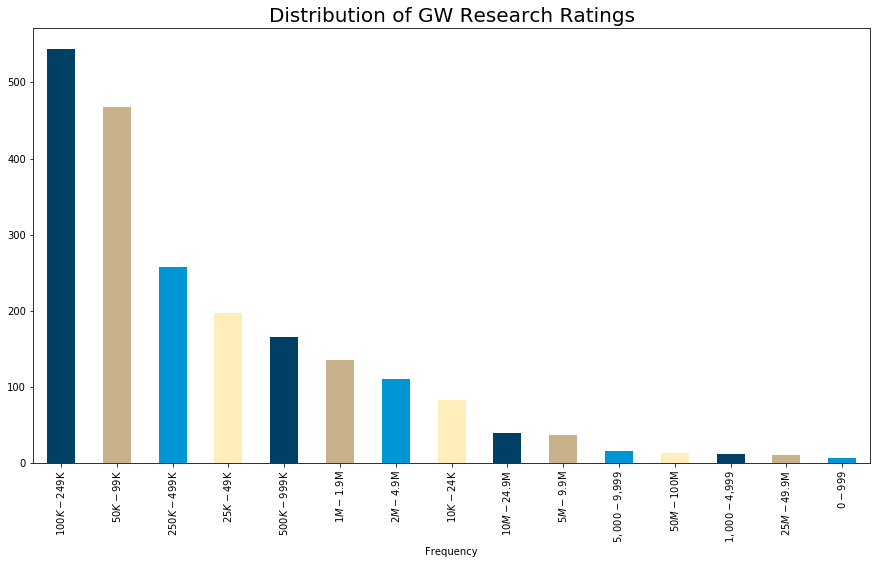

In [243]:
# plot distribution of GW Research Ratings
rr['GW Research Rating Desc'].value_counts().plot(kind='bar', figsize=(15,8), 
                                                  color=['#004065', '#c8b18b', '#0096d6', '#ffeebb'] )
plt.title('Distribution of GW Research Ratings', fontsize=20)
plt.xlabel('Frequency')

### Distribution of Confirmed Ratings

Confirmed ratings, also known as Gift Officer Ratings, take into account not only philanthropic capacity, but also a prospect's affinity for GW as well as their inclination to give. 

In [244]:
#subset data to just remove blank cells
cr = pros[pros['Confirmed Rating Desc'] != ""]
cr = cr[cr['Confirmed Rating Desc'] != 'Not Rated']
cr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2315 entries, 0 to 2974
Data columns (total 90 columns):
Entity ID                          2315 non-null int64
Prospect ID                        2315 non-null int64
Primary Prospect Ind               2315 non-null object
Person or Org Ind                  2315 non-null object
Spouse ID                          2315 non-null object
Spouse Prospect ID                 2315 non-null object
Prospect Type Description          2315 non-null object
Confirmed Rating Code              2315 non-null object
Confirmed Rating Desc              2315 non-null object
Confirmed Eval Date                2315 non-null object
Overall Engagement Score           2315 non-null object
Philanthropic Engagement Score     2315 non-null object
Volunteer Engagement Score         2315 non-null object
Experiential Engagement Score      2315 non-null object
Communication Engagement Score     2315 non-null object
GW Research Rating Code            2315 non-null object

Text(0.5, 0, 'Frequency')

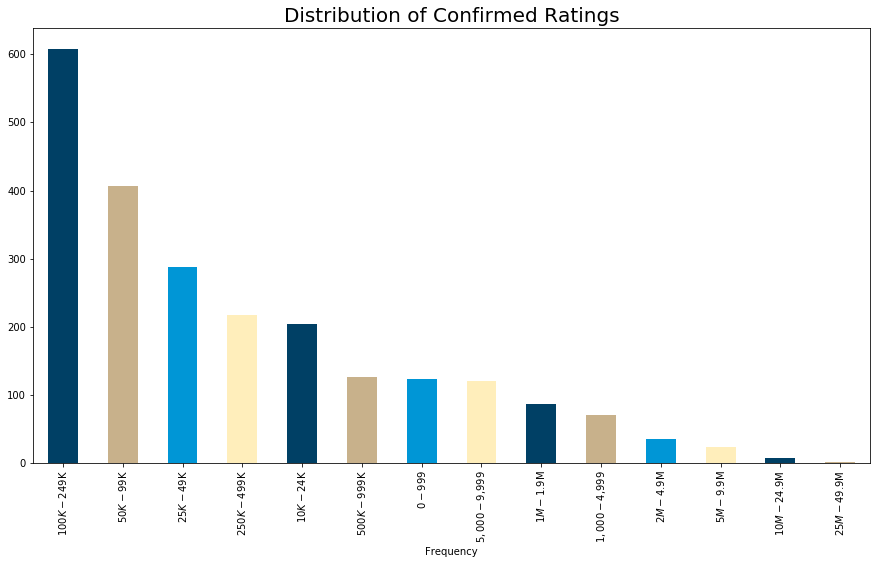

In [245]:
# plot distribution of GW Research Ratings
cr['Confirmed Rating Desc'].value_counts().plot(kind='bar', figsize=(15,8), 
                                                  color=['#004065', '#c8b18b', '#0096d6', '#ffeebb'] )
plt.title('Distribution of Confirmed Ratings', fontsize=20)
plt.xlabel('Frequency')

# Exploratory Data Analysis of Proposal Data

Now that we know who our prospects are, let's take a look at past and current proposals.

### Distribution of Proposal Status

Each proposal has an active status that reflects the current position of the proposal: 

- Open: Proposal is in either Proposal Stage Clearance or Ask Made
- Closed: Proposal is in either Proposal Stage Ask Accepted or Ask Declined
- Withdrawn: Proposal was never solicited and removed from the database; Proposal Stage remains in Clearance

Text(0.5, 1.0, 'Distribution of Proposal Status')

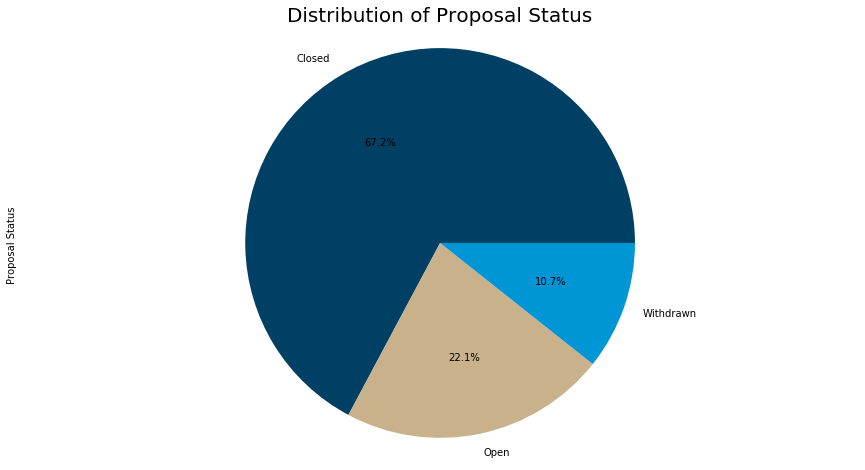

In [246]:
# plotting distribution of Proposal Status
data['Proposal Status'].value_counts().plot(kind='pie', figsize=(15,8), autopct='%1.1f%%', 
                                            colors=['#004065', '#c8b18b', '#0096d6'])
plt.axis('equal')
plt.title('Distribution of Proposal Status', fontsize=20)

### Distribution of Proposal Stages

Proposals are records of each major gift solicitation a prospect receives over the lifetime of their relationship with the university. Each proposal has an active stage that reflects the current stage of communication with the prospect about a specific funding opportunity at GW. The Proposal Stages are defined as: 
- Clearance:  Proposal has not been solicited yet, but is planned by the Major Gift Officer
- Ask Made:  Proposal has been solicited by the Major Gift Officer
- Ask Accepted:  Proposal has been solicited and the Prospect has agreed to donate
- Ask Declined:  Proposal was solicited but was ultimately declined by the Prospect

Text(0.5, 1.0, 'Distribution of Proposal Stages')

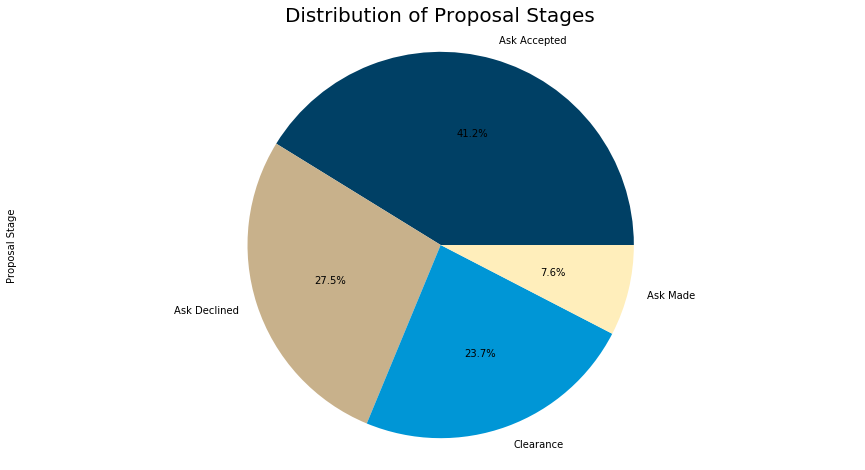

In [247]:
# plotting distribution of Proposal Stages in dataset
data['Proposal Stage'].value_counts().plot(kind='pie', figsize=(15,8), autopct='%1.1f%%', 
                                          colors=['#004065', '#c8b18b', '#0096d6', '#ffeebb'])
plt.axis('equal')
plt.title('Distribution of Proposal Stages', fontsize=20)

### Proportion of Clearance Proposals that are Withdrawn

Clearance proposals that have a Proposal Status of 'Withdrawn' were initially planned to be solicited by the Major Gift Officer, but ultimately the solicitation was never made and the proposal was deactivated in the database. This leads me to ask: What proportion of Clearance Proposals are Withdrawn?

In [248]:
#subset data to just clearance proposals 
cl = data[data['Proposal Stage'] == 'Clearance']
cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 4 to 4775
Columns: 124 entries, Entity ID_x to Prospect Int Y/N
dtypes: datetime64[ns](3), float64(10), int64(7), object(104)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'Proportion of Proposal Status within Clearance Proposals')

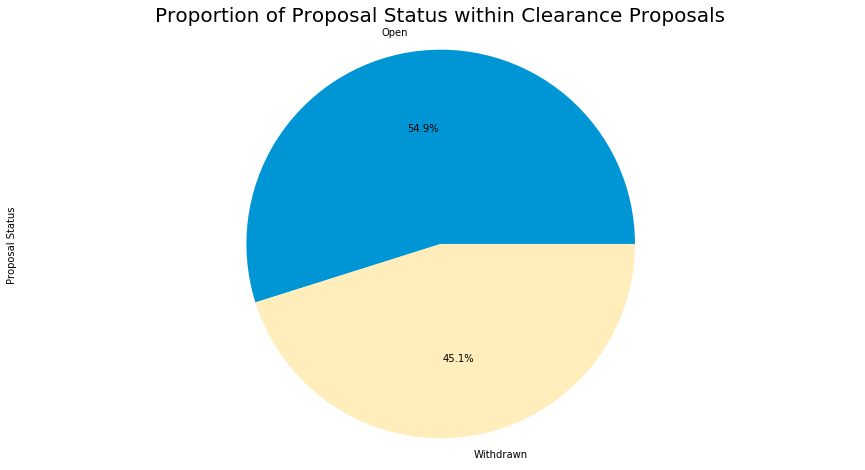

In [249]:
#plotting proportion of proposal status within clearance proposals
cl['Proposal Status'].value_counts().plot(kind='pie', figsize=(15,8), autopct='%1.1f%%', 
                                            colors=[ '#0096d6', '#ffeebb']) #colors
plt.axis('equal')
plt.title('Proportion of Proposal Status within Clearance Proposals', fontsize=20)

### Active Proposals 

Active Proposals are those that are still waiting for the gift to come in and have the transaction linked to the proposal. Now that we know that more than half of the proposals in Clearance in our dataset are active and still expected to be solicited in the future, let's look at the distribution of Active proposals.

In [250]:
#subset data to just Active proposals
act = data[data['Active'] == 'Y']
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 4 to 4777
Columns: 124 entries, Entity ID_x to Prospect Int Y/N
dtypes: datetime64[ns](3), float64(10), int64(7), object(104)
memory usage: 1.0+ MB


Text(0.5, 1.0, 'Proportion of Proposal Stage within Active Proposals')

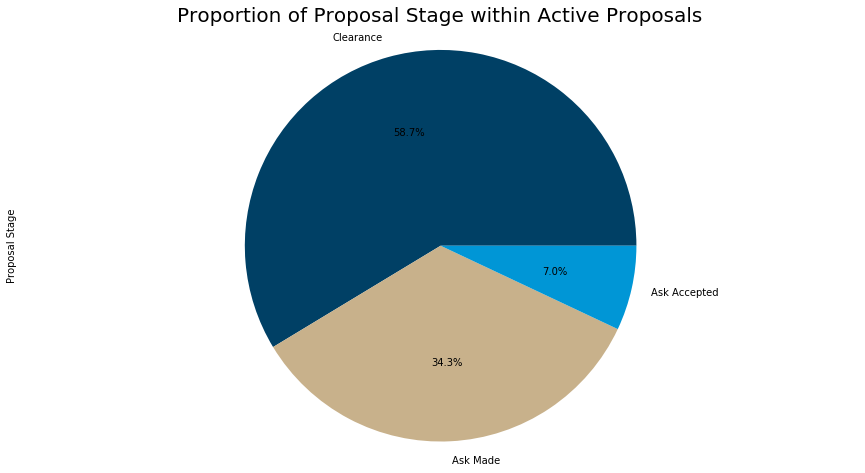

In [251]:
#plotting proportion of proposal status within active proposals
act['Proposal Stage'].value_counts().plot(kind='pie', figsize=(15,8), autopct='%1.1f%%', 
                                            colors=['#004065', '#c8b18b', '#0096d6']) #colors
plt.axis('equal')
plt.title('Proportion of Proposal Stage within Active Proposals', fontsize=20)

### Schools and Units

What are these proposals for? Each proposal must include a Proposal Unit to which the result of the solicitation will be distributed. This is an important part of the proposal, so each school and unit can forecast future attainment from the active, open proposals in the donor database.

Text(0.5, 0, 'Frequency')

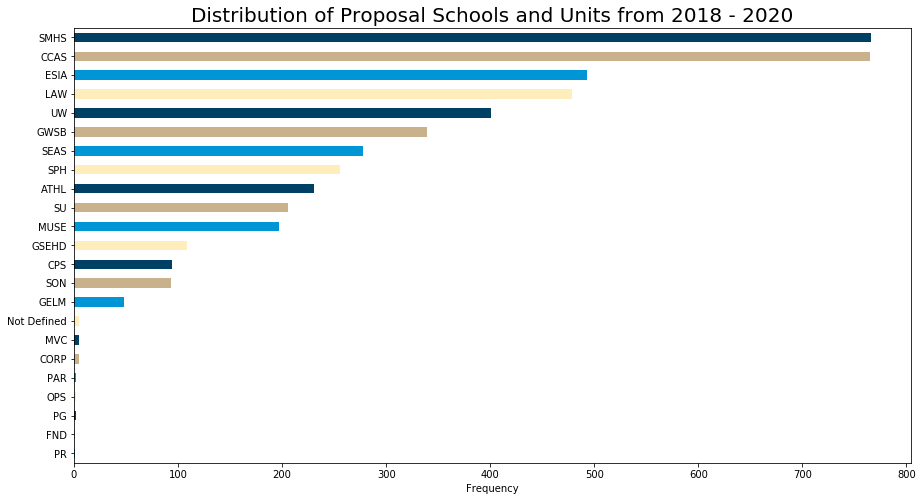

In [252]:
# plotting distribution of proposals across all schools and units
data['Proposal Unit'].value_counts().plot(kind='barh', figsize=(15,8), 
                                                  color=['#004065', '#c8b18b', '#0096d6', '#ffeebb'] ).invert_yaxis()
plt.title('Distribution of Proposal Schools and Units from 2018 - 2020', fontsize=20)
plt.xlabel('Frequency')

### Proposal Titles

In addition to identifying which school and unit for which the prospect will be solicited, each proposal is given a Proposal Title to add specificity and in order to keep track of solicitations if one prospect is being solicited for multiple proposals at the same time within the same school or unit. Let's analyze which words or phrases are used the most often in Proposal Titles to identify any emerging trends. 

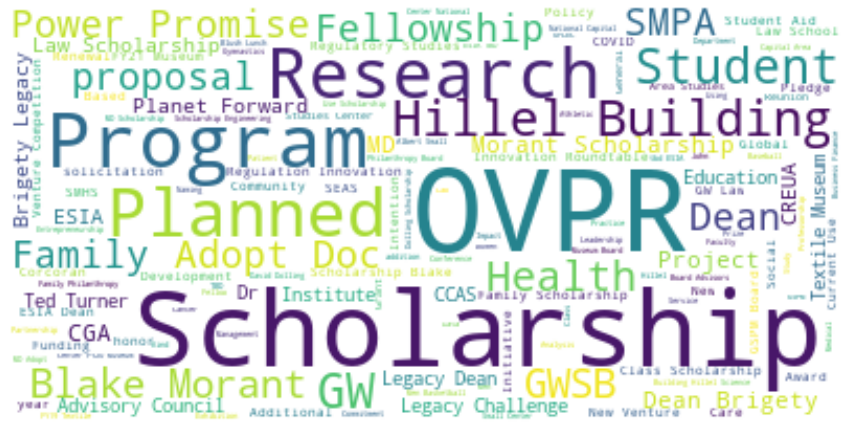

In [253]:
#creating a word cloud of proposal titles
text = " ".join(title for title in prop['Proposal Title'])

# set stopwords
stopwords = set(STOPWORDS)
stopwords.update(["Fund", "Support", "Bequest", "Dues", "Gift", "Ask", "Sponsorship", 
                  "Endowment", "Endowed", "Membership", "Annual"]) #remove common proposal title words

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000,stopwords=stopwords, contour_width=3)

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[15,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Analysis of Proposal Amounts

Each proposal has four different amounts associated: 

- Anticipated Ask Amount: The intended solicitation amount
- Ask Amount: The amount that the prospect was solicited for
- Expected Amount: The amount the MGO expects to be donated as a result of their solicitation
- Result: The amount that the prospect gives to GW as a result of the solicitation

### Analysis of Anticipated Ask Amounts

The Anticipated Ask Amount of the proposal is the amount for which the prospect is expected to be solicited by the MGO. 

In [254]:
#calculate mean of the anticipated ask amounts
mn = data['Anticipated Ask Amount'].mean()
currency = "${:,.2f}".format(mn)
print(currency)

$253,030.14


In [255]:
#calculate median of the anticipated ask amounts
mdn = data['Anticipated Ask Amount'].median()
currency ="${:,.2f}".format(mdn)
print(currency) 

$40,000.00


In [256]:
#calculate mode of the anticipated ask amounts
mde = data['Anticipated Ask Amount'].mode()
currency = "${:,.2f}".format(10000)
print(currency)

$10,000.00


### Analysis of Ask Amounts

The Ask Amount is the amount for which the prospect was solicited by the MGO. 

In [257]:
#calculate mean of the ask amounts
mn = data['Ask Amount'].mean()
currency = "${:,.2f}".format(mn)
print(currency)

$202,030.06


In [258]:
#calculate medain of the ask amounts
mdn = data['Ask Amount'].median()
currency = "${:,.2f}".format(mdn)
print(currency)

$15,000.00


In [259]:
#calculate mode of the ask amounts
mde = data['Ask Amount'].mode()
currency = "${:,.2f}".format(0)
print(currency)

$0.00


### Analysis of Expected Amounts

The Expected Amount is the amount the MGO expects to be donated as a result of their solicitaion.

In [260]:
#calculate mean of the expected amounts
mn = data['Expected Amount'].mean()
currency = "${:,.2f}".format(mn)
print(currency)

$200,628.93


In [261]:
#calculate medain of the expected amounts
mdn = data['Expected Amount'].median()
currency = "${:,.2f}".format(mdn)
print(currency)

$25,000.00


In [262]:
#calculate mode of the expected amounts
mde = data['Expected Amount'].mode()
currency = "${:,.2f}".format(5000)
print(currency)

$5,000.00


### Analysis of Result

The Result of the proposal is the amount that the prospect gives to GW as a result of the solicitation. 

In [263]:
#calculate mean of the results
mn = data['Result'].mean()
currency = "${:,.2f}".format(mn)
print(currency)

$49,191.80


In [264]:
#calculate median of the results
mdn = data['Result'].median()
currency = "${:,.2f}".format(mdn)
print(currency)

$0.00


In [265]:
#calculate mode of the results
mde = data['Result'].mode()
currency = "${:,.2f}".format(0)
print(currency)

$0.00


#### Recalculation of Result
The results of this analysis is skewed due to the large proportion of Ask Declined and Withdrawn proposals. Let's create a subset of Ask Accepted proposals and examine the mean, median and mode for this group of proposals. 

In [266]:
#subset to only proposals that are Ask Accepted
acpt = data[data['Proposal Stage'] == 'Ask Accepted']
acpt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 4776
Columns: 124 entries, Entity ID_x to Prospect Int Y/N
dtypes: datetime64[ns](3), float64(10), int64(7), object(104)
memory usage: 1.9+ MB


In [267]:
#calculate mean of the results from ask accepted proposals
mn = acpt['Result'].mean()
currency = "${:,.2f}".format(mn)
print(currency)

$118,615.85


In [268]:
#calculate median of the results from ask accepted proposals
mdn = acpt['Result'].median()
currency = "${:,.2f}".format(mdn)
print(currency)

$15,000.00


In [269]:
#calculate mode of the results from ask accepted proposals
mde = acpt['Result'].mode()
currency = "${:,.2f}".format(5000)
print(currency)

$5,000.00


### Correlation Between Anticipated Ask Amounts and Ask Amounts

How often do MGOs really ask for the amount that they anticipated they would ask for when the proposal was created?

In [270]:
#subset data to proposals with an Ask Amount
aaa = data[data['Ask Amount'] != 0]
aaa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3636 entries, 0 to 4777
Columns: 124 entries, Entity ID_x to Prospect Int Y/N
dtypes: datetime64[ns](3), float64(10), int64(7), object(104)
memory usage: 3.5+ MB


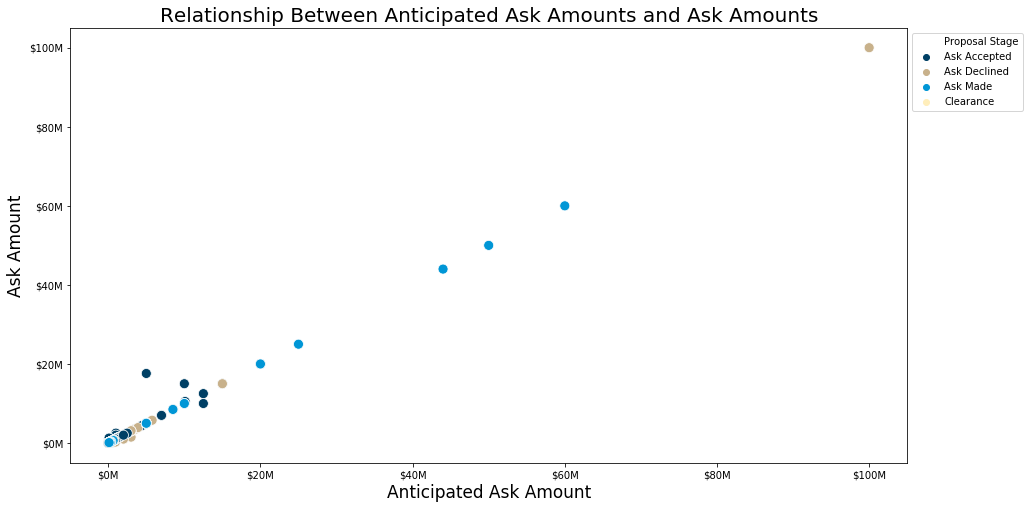

In [271]:
#graphing relationship between Anticipated Ask Amounts and Ask Amounts
plt.figure(figsize=(15,8))
g = sbn.scatterplot(data=aaa, x="Anticipated Ask Amount", y="Ask Amount", hue="Proposal Stage", s=100)
plt.title('Relationship Between Anticipated Ask Amounts and Ask Amounts', fontsize=20)
plt.legend().set_bbox_to_anchor((1,1)) #move legend outside chart
plt.xlabel('Anticipated Ask Amount', fontsize=17)
plt.ylabel('Ask Amount', fontsize=17)
g.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'${:,.0f}'.format(x/1000000)+'M')) #format x-axis
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'${:,.0f}'.format(y/1000000)+'M')) #format y-axis
plt.show()

In [272]:
#calculate the pearson correlation coefficient
scipy.stats.pearsonr(aaa['Anticipated Ask Amount'], aaa['Ask Amount'])

(0.9953113813646739, 0.0)

### Correlation Between Anticipated Ask Amounts and Expected Amounts

How often do MGOs expect that the prospect will give the amount that they anticipated asking for?

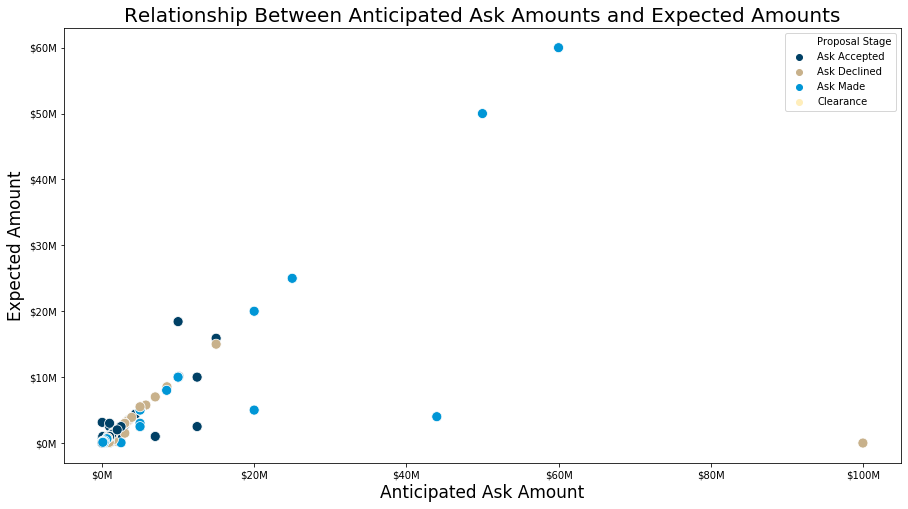

In [273]:
#graphing relationship between Anticipated Ask Amounts and Expected Amounts
plt.figure(figsize=(15,8))
g = sbn.scatterplot(data=aaa, x="Anticipated Ask Amount", y="Expected Amount", hue="Proposal Stage", s=100)
plt.title('Relationship Between Anticipated Ask Amounts and Expected Amounts', fontsize=20)
plt.legend().set_bbox_to_anchor((1,1)) #move legend to top right of chart
plt.xlabel('Anticipated Ask Amount', fontsize=17)
plt.ylabel('Expected Amount', fontsize=17)
g.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'${:,.0f}'.format(x/1000000)+'M')) #format x-axis
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'${:,.0f}'.format(y/1000000)+'M')) #format y-axis
plt.show()

In [274]:
#calculate the pearson correlation coefficient
scipy.stats.pearsonr(aaa['Anticipated Ask Amount'], aaa['Expected Amount'])

(0.6592651476615863, 0.0)

### Correlation Between Ask Amounts and Expected Amounts

How often do MGOs expect that the prospect will give the full Ask Amount?

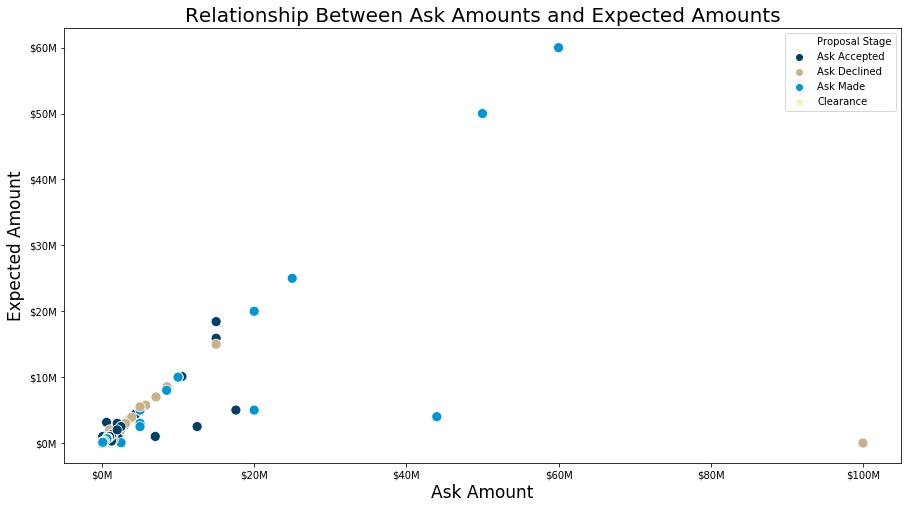

In [275]:
#graphing relationship between Ask Amounts and Expected Amounts
plt.figure(figsize=(15,8))
g = sbn.scatterplot(data=aaa, x="Ask Amount", y="Expected Amount", hue="Proposal Stage", s=100)
plt.title('Relationship Between Ask Amounts and Expected Amounts', fontsize=20)
plt.legend().set_bbox_to_anchor((1,1)) #move legend to top right of chart
plt.xlabel('Ask Amount', fontsize=17)
plt.ylabel('Expected Amount', fontsize=17)
g.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'${:,.0f}'.format(x/1000000)+'M')) #format x-axis
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos:'${:,.0f}'.format(y/1000000)+'M')) #format y-axis
plt.show()

In [276]:
#calculate the pearson correlation coefficient
scipy.stats.pearsonr(aaa['Ask Amount'], aaa['Expected Amount'])

(0.6635763486623804, 0.0)

## Projecting Current Fiscal Year Attainment

Looking at the open, active proposals we have in the donor database, we can project how much money GW will raise by the end of the fiscal year. 

In [277]:
#subset only active proposals expected to close in FY21
act21 = act[act['Expected Fiscal Year'] == 2021].copy()
act21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 4 to 4777
Columns: 124 entries, Entity ID_x to Prospect Int Y/N
dtypes: datetime64[ns](3), float64(10), int64(7), object(104)
memory usage: 977.5+ KB


### Optimistic Attainment Projection for Current Fiscal Year

The optimistic attainment projection is a simple sum of all of the Expected Amounts of the active proposals. If every open, proposal closes exactly as we expect, will we meet or exceed our goal for the fiscal year?

In [278]:
#sum of expected amounts
op = act21['Expected Amount'].sum()
currency = "${:,.2f}".format(op)
print(currency)

$129,548,035.31


In [279]:
# adding optimistic projected attainment to current attainment to project total fiscal year attainment
current_attainment = 20000000
ops = op + current_attainment
currency = "${:,.2f}".format(ops)
print(currency)

$149,548,035.31


### Conservative Attainment Projection for Current Fiscal Year

The Conservative Attainment projection utilizes an industry accepted projection methodology that discounts certain proposals based on their Proposal Stage and the Probability that it will close at the expected amount. Based on our Conservative Attainment projection analysis, will we meet or exceed our goal for the fiscal year?

In [280]:
act21['Probability'].head()

4     0.50
5     0.75
31    0.75
48    0.50
52    0.75
Name: Probability, dtype: float64

In [281]:
#insert new column with the multipliers for our projection methodology

#create a list of conditions
conditions = [
    (act21['Proposal Stage'] == 'Ask Accepted'), 
    (act21['Proposal Stage'] == 'Ask Made') & (act21['Probability'] == 1), 
    (act21['Proposal Stage'] == 'Ask Made') & (act21['Probability'] == 0.75),
    (act21['Proposal Stage'] == 'Ask Made') & (act21['Probability'] == 0.50),
    (act21['Proposal Stage'] == 'Ask Made') & (act21['Probability'] == 0.25),
    (act21['Proposal Stage'] == 'Ask Made') & (act21['Probability'] == 0.00),
    (act21['Proposal Stage'] == 'Clearance') & (act21['Probability'] == 1),
    (act21['Proposal Stage'] == 'Clearance') & (act21['Probability'] == 0.75),
    (act21['Proposal Stage'] == 'Clearance') & (act21['Probability'] == 0.50),
    (act21['Proposal Stage'] == 'Clearance') & (act21['Probability'] == 0.25),
    (act21['Proposal Stage'] == 'Clearance') & (act21['Probability'] == 0.00),
]
#multipliers to be populated in new column
multi = [1, 1, 0.75, 0.25, 0.25, 0, 0.1, 0.1, 0, 0, 0]

#populate multiplier values in column based on conditions
act21['Multiplier'] = nm.select(conditions, multi)

#display updated data frame
act21.head()

,Entity ID_x,Prospect ID,Primary Entity Record Type(s),Top 200,Proposal ID,Proposal Manager Start Date,Active,Proposal Status,Proposal Stage,Proposal Type,...,Degree Desc 2,Major 2,Speciality 1,Speciality 2,Speciality 3,Speciality 4,No Contact Ever,Special Handling,Prospect Int Y/N,Multiplier
4,621376,142684,Friend,No,16545,1565308800000000000,Y,Open,Clearance,School/Unit Support,...,,,,,,,,,Y,0.00
5,621376,142684,Friend,No,18197,1594857600000000000,Y,Open,Clearance,School/Unit Support,...,,,,,,,,,Y,0.10
31,435296,149313,Alumnus/a,No,16830,1567987200000000000,Y,Open,Clearance,To Be Determined,...,,,,,,,,No Affinity Mailings - Mail Exclusion,N,0.10
48,166994,106298,Corporation,No,17515,1599523200000000000,Y,Open,Clearance,Centers/Institutes,...,,,,,,,,,Y,0.00
52,710654,148107,Corporation,No,17528,1599523200000000000,Y,Open,Ask Made,Centers/Institutes,...,,,,,,,,,Y,0.75


In [282]:
#insert new column to calculate conservative projected attainment values

#create a list of conditions
conditions = [
    (act21['Proposal Stage'] == 'Ask Accepted'),
    (act21['Proposal Stage'] == 'Ask Made'),
    (act21['Proposal Stage'] == 'Clearance')
]

#calculate the projected values
calc = [(act21['Result'] * act21['Multiplier']), (act21['Expected Amount'] * act21['Multiplier']), 
       (act21['Expected Amount'] * act21['Multiplier'])]

#create a new column to populate calculated values
act21['Calculations'] = nm.select(conditions, calc)

act21.head(10)

,Entity ID_x,Prospect ID,Primary Entity Record Type(s),Top 200,Proposal ID,Proposal Manager Start Date,Active,Proposal Status,Proposal Stage,Proposal Type,...,Major 2,Speciality 1,Speciality 2,Speciality 3,Speciality 4,No Contact Ever,Special Handling,Prospect Int Y/N,Multiplier,Calculations
4,621376,142684,Friend,No,16545,1565308800000000000,Y,Open,Clearance,School/Unit Support,...,,,,,,,,Y,0.00,0.0
5,621376,142684,Friend,No,18197,1594857600000000000,Y,Open,Clearance,School/Unit Support,...,,,,,,,,Y,0.10,2000.0
31,435296,149313,Alumnus/a,No,16830,1567987200000000000,Y,Open,Clearance,To Be Determined,...,,,,,,,No Affinity Mailings - Mail Exclusion,N,0.10,2000.0
48,166994,106298,Corporation,No,17515,1599523200000000000,Y,Open,Clearance,Centers/Institutes,...,,,,,,,,Y,0.00,0.0
52,710654,148107,Corporation,No,17528,1599523200000000000,Y,Open,Ask Made,Centers/Institutes,...,,,,,,,,Y,0.75,3750.0
55,474308,132332,Corporation,No,17513,1599523200000000000,Y,Open,Clearance,Centers/Institutes,...,,,,,,Y,No Contact Ever - Solicitation/Mail Exclusion,N,0.00,0.0
59,636549,143505,Corporation,No,17516,1599523200000000000,Y,Open,Clearance,Centers/Institutes,...,,,,,,,,N,0.00,0.0
63,168917,148118,Other Organizations,No,17531,1599523200000000000,Y,Open,Clearance,Centers/Institutes,...,,Board of Trade,,,,,,N,0.00,0.0
71,416424,138263,Corporation,No,18742,1602201600000000000,Y,Open,Ask Accepted,Centers/Institutes,...,,,,,,,,N,1.00,100000.0
82,496090,134635,Corporation,No,18506,1601424000000000000,Y,Open,Ask Made,Centers/Institutes,...,,,,,,,,N,0.75,1125000.0


In [283]:
#sum of calculations
con = act21['Calculations'].sum()
currency = "${:,.2f}".format(con)
print(currency)

$31,667,008.32


In [284]:
#adding conservative projected attainment to current attainment to project total fiscal year attainment
current_attainment = 20000000
cons = con + current_attainment
currency = "${:,.2f}".format(cons)
print(currency)

$51,667,008.32


### Graphical Representation of the Gap to Goal

Now that we've calculated our Conservative and Optimistic Attainment projections, let's visually demonstrate the gap to goal to clearly see how much more we have to raise this by the end of the fiscal year.

In [285]:
#create new data frame with calculated values
gap = [['Optimistic', ops], ['Conservative', cons], ['Current Attainment', 20000000], ['Goal', 100000000]]
gap = pd.DataFrame(gap, columns = ['Calculation', 'Value'])
gap.head()

,Calculation,Value
0,Optimistic,1.495480e+08
1,Conservative,5.166701e+07
2,Current Attainment,2.000000e+07
3,Goal,1.000000e+08


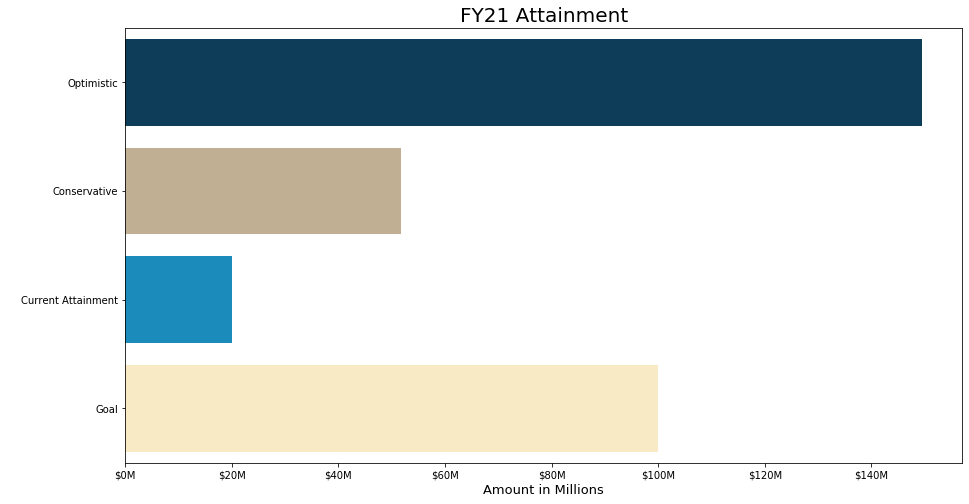

In [286]:
#plot values to visually demonstrate gap to goal 

#set custom color palette
colors = ['#004065', '#C8B18B', '#0096D6', '#FFEEBB']
sbn.set_palette(sbn.color_palette(colors))

#create barplot
plt.figure(figsize=(15,8)) #set chart size
g = sbn.barplot(data=gap, x='Value', y='Calculation', palette=colors) #barplot
plt.title('FY21 Attainment', fontsize=20)
plt.xlabel('Amount in Millions', fontsize=13)
plt.ylabel(' ')
g.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'${:,.0f}'.format(x/1000000)+'M')) #format x-axis

## Key Findings

When analyzing our prospect data, unsurprisingly, we found that a majority of our prospects live in the DMV nearby the university, as well as in states with major urban areas, such as New York and California. Similarly unsurprising, a majority of the prospects are alumni, with a majority of our alumni having graduated from the largest school in the university, the Columbian College of Arts and Sciences. What was surprising, however, is how some class years were significantly more "generous" than others. When analyzing all three philanthropic capacity ratings, we found a majority of our major gift prospects from the last few years had a major gift capacity around \\$100K - \\$249K, with only a handful of our prospects having the capacity to give \\$1M+. 

When analyzing the proposal data, a majority of the proposals were closed, which was to be expected. Given the Proposal Stages are so connected to the Proposal Status, it was also expected that a majority of the proposals would be Ask Declined or Ask Accepted. Since proposals are closed as "Withdrawn" from the donor database when they are still in the Clearance stage, I found that just under half of the Clearance proposals had been Withdrawn and were no longer planned solicitations. When looking at the open, active proposals, more than half of the proposals were yet to be solicited, which makes sense given we are less than half of the way through the fiscal year. Next, we looked at what these proposals were for by analyzing the distribution of the beneficiary schools and units. Additionally, I created a wordcloud of proposal titles to discover trends, removing any common proposal terms that did not accurately describe the allocation. I was heartened to see some of the most common words aligned with scholarships and research, as these are two important funding areas for the university. 

Next, I did some analysis of the four proposal amounts: Anticipated Ask Amounts, Ask Amounts, Expected Amounts, and the Results. When calculating the mean, median, and mode for each of these proposal amounts, we can see how each of these amounts vary dramatically over the lifetime of the proposal. While the average Anticipated Ask Amount is \\$253K, the average Ask Amount is \\$202K  and the average Expected Amount is \\$200K. When analyzing the Result, I had to subset the data to only Ask Accepted proposals, as all other Proposal Stages had a Result of \\$0 which ended up skewing the data. The average Result of the Ask Accepted proposals, was much lower at \\$118K. The modes of the proposal amounts also told an interesting story. While most proposals start at a high level, over the lifetime of the proposal, they begin to decrease, as the mode of the Ask Amounts and the mode of the Expected Amounts are significantly smaller. The mode of the Results of the Ask Accepted Proposals was the smallest, at just \\$5K. The strongest correlation was between the Anticipated Ask Amounts and the Ask Amounts, which is exactly what we would hope to see, as we would like the MGOs to ask for the amount they had initially anticipated. The correlation is less strong with the Expected Amounts, as generally we tend to expect the prospect will give less than we ask for. Finally, based on the Conservative Attainment projection analysis, we will not meet our fundraising goal for this fiscal year, but will actually raise approximately \\$49M less than we had hoped for. Based on our Optimistic Attainment projection, however, we will raise \\$49M more than our fundraising goal for the fiscal year. 

## Learning Process

Similar to my experience with project 1, my learning process was incredibly iterative - I continually went back to my code time and again to make improvements as I learned more. Initially, I struggled coding the map of the geographic distribution of the prospects, but after our class lecture on maps using the Climate Change data, I realized my error and was able to create the map as intended. At first, I struggled creating the word cloud, but after some troubleshooting, it came out exactly as I thought it would and provided some surprising results. Once again, whenever I didn't know something or got an error message, Google and StackOverflow were my go-to resources. The most exciting part of this learning process, for me, was being able to code the Conservative and Optimistic Attainment Projection analysis in Python. I do this analysis on a daily basis using Excel spreadsheets with as much automation as possible, but being able to have this code pre-written and re-run the code for any sort of dataset without the potential of Excel crashing will be revolutionary. I considered doing some additional analysis on this dataset, particularly about the ages of proposals and whether or not proposals that are pre-planned or proposals that are retroactive are the most successful, but I did not think I would have enough time to present my findings in the 5 minutes alotted. Maybe I will do this analysis for project 3!

## Conclusion 

One surprising result of this analysis is that, in the last two years, the class of 1968 and 1979 had the largest proportion of the alumni donorbase. Upon further reflection, this could because these class years had significant reunion anniversaries in 2018 and 2019, and alumni from these classes could have been interested in giving a major gift to the university in honor of their reunion. While a majority of our major gift donors in the last two years had the capacity to give \\$100K - \\$249K over five years, the mean Anticipated Ask Amount was in the next highest capacity bracket at \\$253K. The median and mode, however, tells a different story. While, on average, we may be asking our major gift prospects at their capacity level, we are not asking often enough. Therefore, major gift officers need to be increasing their Ask Amounts to make sure they are soliciting prospects for their full philanthropic capacity. While it might seem surprising that the median of the Results of the Ask Accepted proposals was just $15K, this is actually to be expected, as several school boards and councils have dues of \\$15K. 

Finally, based on the Conservative Attainment projection analysis, we will not meet our fundraising goal for this fiscal year, but will actually raise approximately \\$49M less than we had hoped for. Based on our Optimistic Attainment projection, however, we will raise \\$49M more than our fundraising goal for the fiscal year. My recommendation to the major gift officers and DAR leadership in how to increase the Conservative Attainment projection analysis is to move more of these proposals into Ask Made and enter more proposals into the database that are expected to close by the end of this fiscal year. Given we are less than half the way through the fiscal year, we do have time to make course adjustments now to ensure that we meet or exceed our fundraising goal this fiscal year.

#### Links GitHub and Zenodo Pages:

[GitHub](https://e-roberts.github.io/eroberts22-project2/) and [Zenodo]()